In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from pathlib import Path
csvpath = Path('GS_SentScoreswVOL_2020_csv.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Ticker,Company,Year,QTR,Sent_Neg,Sent_Neu,Sent_Pos,Price_DayPrior,Price_DayOf,Price_DayAfter,...,PerCngNeu,PerCngPos,PRICE_PerCng_PriorEarnings,PRICE_PerCng_DayPrior,PRICE_PerCng_DayAfter,PRICE_PerCng_2DaysAfter,VOL_PerCng_PriorEarnings,VOL_PerCng_DayPrior,VOL_PerCng_DayAfter,VOL_PerCng_2DaysAfter
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-15,GS,Goldman Sachs,2019,Q3,0.018,0.845,0.136,205.82,206.46,207.42,...,-0.021,0.214,-0.042,0.003,0.005,-,56.00%,260.52%,-58.68%,-65.10%
2019-07-16,GS,Goldman Sachs,2019,Q2,0.025,0.863,0.112,211.58,215.52,213.30,...,-0.005,-0.009,0.078,0.019,-0.010,-0.005,-20.20%,103.20%,-51.10%,-45.89%
2019-04-15,GS,Goldman Sachs,2019,Q1,0.020,0.867,0.113,207.84,199.91,201.84,...,0.012,-0.066,0.014,-0.038,0.010,0.04,-56.40%,29.84%,-26.67%,-36.60%
2019-01-16,GS,Goldman Sachs,2018,Q4,0.021,0.857,0.121,179.91,197.08,199.09,...,0.017,-0.148,-0.111,0.095,0.010,0.028,156.50%,421.81%,-46.18%,-62.81%
2018-10-16,GS,Goldman Sachs,2018,Q3,0.016,0.843,0.142,215.22,221.70,228.28,...,0.001,0.029,-0.040,0.030,0.030,0.015,-36.20%,77.70%,-16.38%,-49.44%


In [4]:
#See List of column titles
for col in df.columns:
    print(col)

Ticker
Company
Year
QTR
Sent_Neg
Sent_Neu
Sent_Pos
Price_DayPrior
Price_DayOf
Price_DayAfter
Price_2DaysAfter
VOL_DayPrior
VOL_DayOf
VOL_DayAfter
VOL_2DaysAfter
PerCngNeg
PerCngNeu
PerCngPos
PRICE_PerCng_PriorEarnings
PRICE_PerCng_DayPrior
PRICE_PerCng_DayAfter
PRICE_PerCng_2DaysAfter
VOL_PerCng_PriorEarnings
VOL_PerCng_DayPrior
VOL_PerCng_DayAfter
VOL_PerCng_2DaysAfter


In [5]:
x_train=df.iloc[0:12,5:6].copy()
x_train.dropna()

,Sent_Neu
Date,
2019-10-15,0.845
2019-07-16,0.863
2019-04-15,0.867
2019-01-16,0.857
2018-10-16,0.843
2018-07-17,0.842
2018-04-17,0.830
2018-01-17,0.878
2017-10-17,0.856


In [6]:
y_train=df.iloc[0:12,:]['PRICE_PerCng_DayAfter'] #.set_index('Date') #.copy()
y_train.dropna()

Date
2019-10-15    0.005
2019-07-16   -0.010
2019-04-15    0.010
2019-01-16    0.010
2018-10-16    0.030
2018-07-17    0.001
2018-04-17    0.001
2018-01-17   -0.011
2017-10-17    0.025
2017-07-18   -0.002
2017-04-18   -0.007
2017-01-18   -0.012
Name: PRICE_PerCng_DayAfter, dtype: float64

In [7]:
x_test =df.iloc[13:18,5:6].copy()
x_test.dropna()

,Sent_Neu
Date,
2016-07-19,0.864
2016-04-19,0.840
2016-01-20,0.863
2015-10-15,0.844
2015-07-16,0.852


In [8]:
y_test=df.iloc[13:18,:]['PRICE_PerCng_DayAfter'].copy()
y_test.dropna()

Date
2016-07-19    0.002
2016-04-19    0.027
2016-01-20   -0.014
2015-10-15    0.001
2015-07-16    0.006
Name: PRICE_PerCng_DayAfter, dtype: float64

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [10]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(x_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ecbca90>,
      dtype=object)

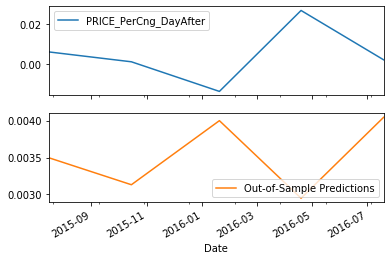

In [11]:
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [12]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["PRICE_PerCng_DayAfter"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 0.013546005302932505


In [13]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(x_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["PRICE_PerCng_DayAfter"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.013009114334445663


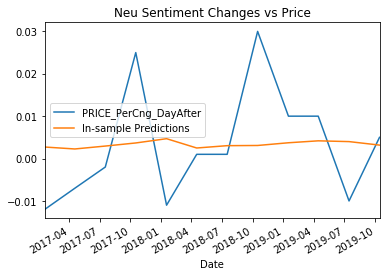

In [14]:
# Plot the final forecast
in_sample_results.plot(title="Neu Sentiment Changes vs Price")